# Bow Image Classification | Voting Ensemble

### *Course Project - Deep Learning*
#### `Part 4 | Voting Ensemble`

**Author:** Sarang Galada<br>
**School:** School of Computing & Data Science, Sai University<br>
**Email ID:** sarang.g-25@scds.saiuniversity.edu.in<br>
**Date created:** 26/12/2023<br><br>
**Description:** Classification of Bow (weapon) images into 5 types using Transfer Learning and Fine Tuning

*   *Problem*: `Image Classification`
*   *Dataset*: `Bow Images`
*   *Model*: `Voting Ensemble`
*   *Key library used*: `TensorFlow Keras`

## Downloading the models and datasets

In [1]:
# Import required libraries

import numpy as np
np.random.seed(42)

import scipy
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
print(tf.__version__)

from tensorflow import keras
tf.random.set_seed(42)

from PIL import Image

2.15.0


In [2]:
# Mount the Google Drive

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# Since the model and datasets are already prepared, load them directly from Drive

X_train = np.load('/content/gdrive/MyDrive/Models/BowImageClassification/X_train.npy')
X_test = np.load('/content/gdrive/MyDrive/Models/BowImageClassification/X_test.npy')
y_train = np.load('/content/gdrive/MyDrive/Models/BowImageClassification/y_train.npy')
y_test = np.load('/content/gdrive/MyDrive/Models/BowImageClassification/y_test.npy')

print(f"No. of training samples: {X_train.shape[0]}")
print(f"No. of testing samples: {X_test.shape[0]}")

No. of training samples: 607
No. of testing samples: 203


In [4]:
labels = np.load('/content/gdrive/MyDrive/Models/BowImageClassification/labels.npy')
print(labels)

['Compound Bow' 'Crossbow' 'Kyudo Bow' 'Longbow' 'Traditional Recurve Bow']


In [5]:
model1_FT = keras.models.load_model('/content/gdrive/MyDrive/Models/BowImageClassification/ResNet50V2_FineTuning_BestModel.h5')
model2_FT = keras.models.load_model('/content/gdrive/MyDrive/Models/BowImageClassification/InceptionV3_FineTuning_BestModel.h5')
model3_FT = keras.models.load_model('/content/gdrive/MyDrive/Models/BowImageClassification/DenseNet121_FineTuning_BestModel.h5')

## Majority Voting Classifier - Ensemble Learning

A majority-rule based Voting Ensemble of the 3 best performing Fine-tuned models previously used (ResNet50V2, InceptionV3, DenseNet121)

In [6]:
# Get classification probabilities of each model on the testing data
proba1 = model1_FT.predict(X_test)
proba2 = model2_FT.predict(X_test)
proba3 = model3_FT.predict(X_test)

# Convert probabilities to class predictions (select argmax)
pred1 = np.argmax(proba1, axis=-1)
pred2 = np.argmax(proba2, axis=-1)
pred3 = np.argmax(proba3, axis=-1)

7/7 [==============================] - 9s 513ms/step


### 'Soft' Voting

The class with highest aggregate probability across the models is taken to be the prediction

In [7]:
# Combine the predictions ('Soft' voting)
ensemble_pred_soft = np.argmax(proba1 + proba2 + proba3, axis=1)
ensemble_pred_soft

array([1, 0, 4, 4, 0, 0, 0, 0, 4, 4, 0, 0, 1, 0, 0, 0, 4, 1, 0, 1, 0, 4,
       0, 0, 0, 4, 0, 0, 0, 0, 0, 1, 4, 0, 0, 0, 0, 4, 4, 4, 4, 4, 0, 0,
       1, 0, 1, 0, 0, 1, 4, 0, 4, 0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0,
       4, 4, 0, 4, 0, 1, 0, 4, 0, 0, 0, 0, 0, 0, 4, 4, 4, 0, 0, 3, 4, 4,
       4, 0, 4, 0, 1, 4, 4, 4, 4, 0, 0, 4, 1, 0, 0, 4, 0, 0, 1, 4, 0, 0,
       4, 0, 0, 0, 4, 1, 0, 1, 4, 1, 1, 0, 4, 4, 0, 0, 0, 4, 0, 0, 4, 0,
       4, 0, 0, 4, 1, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 4, 0, 0, 2, 0, 4, 4,
       0, 1, 4, 0, 0, 0, 4, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1, 4, 4, 0, 4,
       4, 4, 0, 0, 1, 0, 0, 4, 4, 4, 4, 0, 4, 0, 0, 4, 1, 4, 4, 0, 0, 0,
       4, 4, 0, 1, 0])

### 'Hard' Voting

The majority (mode) of the predicted class across the models is taken to be the prediction

In [8]:
# Combine the predictions ('Hard' voting)
ensemble_pred_hard = scipy.stats.mode([pred1, pred2, pred3], axis=0)[0]

# Return the final prediction
ensemble_pred_hard

array([1, 0, 4, 4, 0, 0, 0, 0, 4, 4, 0, 0, 1, 0, 0, 0, 4, 1, 0, 1, 0, 4,
       0, 0, 0, 4, 0, 0, 0, 0, 0, 1, 4, 0, 0, 0, 0, 4, 4, 4, 4, 4, 1, 0,
       1, 0, 1, 0, 0, 1, 4, 0, 4, 0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0,
       4, 4, 0, 4, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 0, 0, 3, 4, 4,
       4, 0, 4, 0, 1, 4, 4, 4, 4, 0, 0, 4, 1, 0, 0, 4, 0, 0, 1, 0, 0, 0,
       4, 0, 0, 0, 4, 1, 0, 1, 4, 1, 1, 0, 4, 4, 0, 0, 0, 4, 0, 0, 4, 0,
       4, 0, 0, 4, 1, 0, 4, 0, 4, 0, 2, 0, 4, 0, 4, 4, 0, 0, 2, 0, 4, 4,
       0, 1, 4, 0, 0, 0, 4, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1, 4, 4, 0, 4,
       3, 4, 0, 0, 1, 0, 0, 4, 4, 4, 4, 0, 2, 0, 0, 4, 1, 4, 4, 0, 0, 0,
       4, 0, 0, 1, 0])

#### We will proceed with the 'Hard' Voting predictions

## Evaluating the Ensemble model

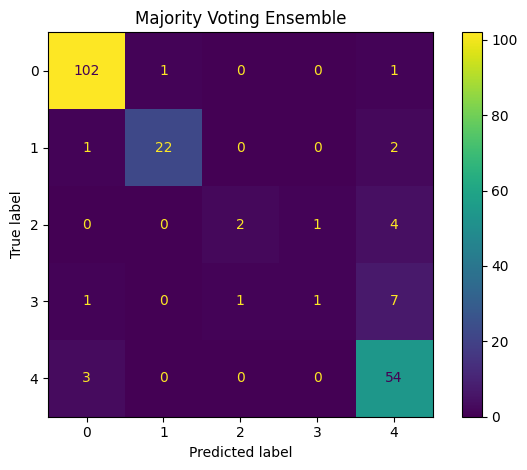

['Compound Bow' 'Crossbow' 'Kyudo Bow' 'Longbow' 'Traditional Recurve Bow']


In [9]:
# Confusion Matrix of the model's predictions on the test data

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true = y_test, y_pred = ensemble_pred_hard))
cm.plot()
plt.title("Majority Voting Ensemble")
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.savefig("ConfMat_maj_voting.png", dpi=300, format='png', pad_inches=0.3)
plt.show()

print(labels)

In [10]:
# Classification report

from sklearn.metrics import classification_report

clf_report = classification_report(y_test, ensemble_pred_hard)
print(clf_report)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       104
           1       0.96      0.88      0.92        25
           2       0.67      0.29      0.40         7
           3       0.50      0.10      0.17        10
           4       0.79      0.95      0.86        57

    accuracy                           0.89       203
   macro avg       0.77      0.64      0.66       203
weighted avg       0.88      0.89      0.87       203



## Predict function

To make predictions on new sample images

In [30]:
# To preprocess the raw image file
def img_preprocess(image):
  shape = np.array(image).shape    # eg. (4588, 2593, 3)
  images = []

  # If image is single-channel, convert to 3-channel RGB
  if(len(shape) == 2):
    image = image.convert(mode='RGB')

  # If image is 4-channel, remove redundant 'transparency' channel (4th)
  if(shape[-1] == 4):
    image = Image.fromarray(np.array(image)[:, :, :3])

  # Resize to 224x224 pixels to satisfy all model requirements
  image = image.resize((224,224))
  images.append(np.array(image))

  # Apply the in-built preprocessing (just pixel scaling) and return
  return keras.applications.resnet_v2.preprocess_input(np.array(images))


# To make ensemble predictions on new sample images
def Ensemble_Predict(image):
  sample = img_preprocess(image)

  # Get classification probabilities of each model on the testing data
  proba1 = model1_FT.predict(sample)
  proba2 = model2_FT.predict(sample)
  proba3 = model3_FT.predict(sample)

  # Convert probabilities to class predictions (select argmax)
  pred1 = np.argmax(proba1, axis=-1)
  pred2 = np.argmax(proba2, axis=-1)
  pred3 = np.argmax(proba3, axis=-1)

  # Combine the predictions ('Hard' voting)
  ensemble_pred_hard = scipy.stats.mode([pred1, pred2, pred3], axis=0)[0]

  # Return the final prediction as the predicted class label
  return labels[ensemble_pred_hard][0]

### Sample prediction

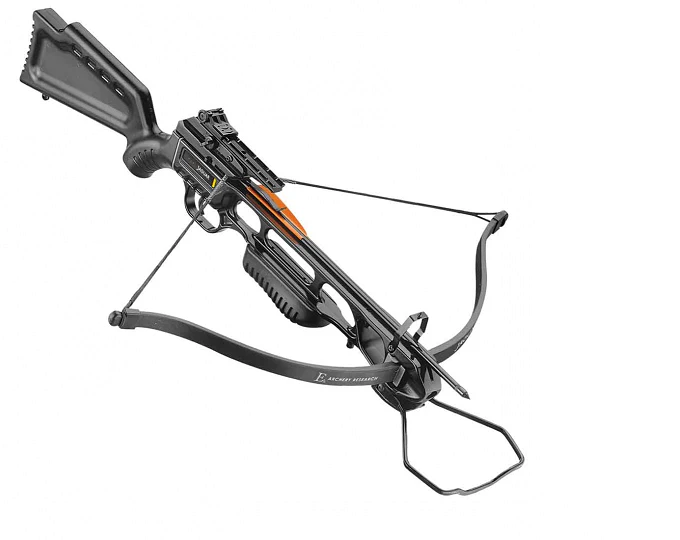

In [31]:
myimg = Image.open('crossbow sample.jpg')
myimg

In [33]:
prediction = Ensemble_Predict(myimg)
print(f"Sample image is a {prediction}")

1/1 [==============================] - 0s 47ms/step
Sample image is a Crossbow


`Correct!`